In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

In [2]:
import imageio

In [3]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.wih = numpy.random.normal(
            0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes)
        )
        self.who = numpy.random.normal(
            0.0, pow(self.inodes, -0.5), (self.onodes, self.hnodes)
        )

        self.lr = learningrate

        self.activation_function = lambda x: scipy.special.expit(x)

        pass

    def train(self, inputs_list, targets_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)

        self.who += self.lr * numpy.dot(
            (output_errors * final_outputs * (1.0 - final_outputs)),
            numpy.transpose(hidden_outputs),
        )
        self.wih += self.lr * numpy.dot(
            (hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
            numpy.transpose(inputs),
        )

        # print("inputs形状:", inputs.shape)
        # print("targets形状:", targets.shape)
        # print("self.wih形状:", self.wih.shape)
        # print("self.who形状:", self.who.shape)

        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T

        # print("inputs形状:", inputs.shape)
        # print("self.wih形状:", self.wih.shape)

        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

    pass


In [4]:
input_nodes = 784
hidden_nodes = 230
output_nodes = 10

learning_rate = 0.2

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [5]:
training_data_file = open("C:/MNIST_csv_all/mnist_train.csv", "r")
training_data_list = training_data_file.readlines()
training_data_file.close()

In [7]:
epochs = 8

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(",")

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        targets = numpy.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

KeyboardInterrupt: 

In [8]:
print("loading...my_own_picture/2828_my_own_9.pnge")
img_array=imageio.imread('C:/my_own_picture/2828_my_own_9.png',as_gray=True)

img_data=255.0-img_array.reshape(784)

img_data=(img_data/255.0*0.99)+0.01
print("min=",numpy.min(img_data))
print("max=",numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28,28),cmap='Greys',interpolation='None')

outputs=n.query(img_data)
print(outputs)

label=numpy.argmax(outputs)
print("network says ",label)



loading...my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0


NameError: name 'image_data' is not defined

loading...my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.01881586]
 [0.95856196]
 [0.00571468]
 [0.16263535]
 [0.06222533]
 [0.36583448]
 [0.00963585]
 [0.81611085]
 [0.00143739]
 [0.0015471 ]]
network says  1


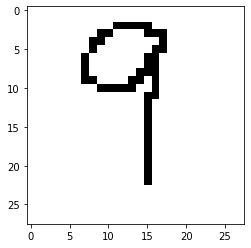

In [9]:
print("loading...my_own_picture/2828_my_own_9.pnge")
img_array=imageio.imread('C:/my_own_picture/2828_my_own_9.png',as_gray=True)

img_data=255.0-img_array.reshape(784)

img_data=(img_data/255.0*0.99)+0.01
print("min=",numpy.min(img_data))
print("max=",numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28,28),cmap='Greys',interpolation='None')

outputs=n.query(img_data)
print(outputs)

label=numpy.argmax(outputs)
print("network says ",label)



In [10]:
epochs = 8

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(",")

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        targets = numpy.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

KeyboardInterrupt: 

loading...my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[7.21287992e-03]
 [9.88415535e-01]
 [7.10347943e-04]
 [1.74089935e-02]
 [7.26852693e-02]
 [8.98882750e-02]
 [1.35622978e-03]
 [2.58903964e-01]
 [1.42823464e-03]
 [7.48905237e-04]]
network says  1


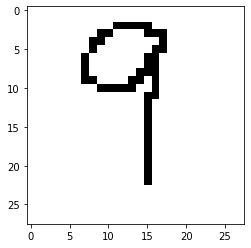

In [11]:
epochs = 8

for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(",")

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        targets = numpy.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

print("loading...my_own_picture/2828_my_own_9.pnge")
img_array=imageio.imread('C:/my_own_picture/2828_my_own_9.png',as_gray=True)

img_data=255.0-img_array.reshape(784)

img_data=(img_data/255.0*0.99)+0.01
print("min=",numpy.min(img_data))
print("max=",numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28,28),cmap='Greys',interpolation='None')

outputs=n.query(img_data)
print(outputs)

label=numpy.argmax(outputs)
print("network says ",label)



loading ... my_own_picture/2828_my_own_3.pnge
min= 0.01
max= 1.0
[[0.00266916]
 [0.02067836]
 [0.01231975]
 [0.89232489]
 [0.00643798]
 [0.01614216]
 [0.09535686]
 [0.00673278]
 [0.01103306]
 [0.00250761]]
network says  3


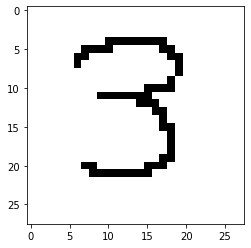

In [12]:
print("loading ... my_own_picture/2828_my_own_3.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_3.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

In [13]:
print("loading ... my_own_picture/2828_my_own_1.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_1.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_1.pnge


FileNotFoundError: No such file: 'C:\my_own_picture\2828_my_own_1.png'

loading ... my_own_picture/2828_my_own_1.pnge
min= 0.01
max= 1.0
[[8.65685299e-04]
 [8.80375755e-01]
 [4.49646479e-03]
 [4.68036008e-02]
 [3.45493220e-05]
 [8.47195280e-04]
 [3.65152276e-04]
 [6.82266350e-04]
 [8.87734272e-04]
 [1.44104896e-03]]
network says  1


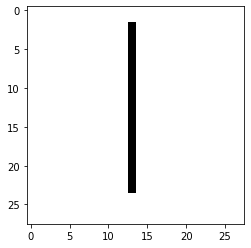

In [14]:
print("loading ... my_own_picture/2828_my_own_1.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_1.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_2.pnge
min= 0.01
max= 1.0
[[2.02198649e-05]
 [7.60124998e-04]
 [9.98582977e-01]
 [2.82259372e-06]
 [3.86286815e-04]
 [4.17023725e-02]
 [3.76969253e-04]
 [1.22060090e-03]
 [3.46470102e-06]
 [6.45477396e-03]]
network says  2


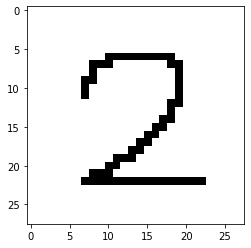

In [15]:
print("loading ... my_own_picture/2828_my_own_2.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_2.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_4.pnge
min= 0.01
max= 1.0
[[2.68414010e-03]
 [3.36268103e-03]
 [7.32530341e-03]
 [6.36129164e-04]
 [9.99719474e-01]
 [1.79025585e-02]
 [5.09140023e-04]
 [1.10066972e-02]
 [3.41694935e-03]
 [3.72149785e-04]]
network says  4


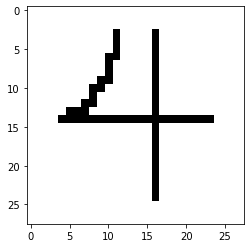

In [16]:
print("loading ... my_own_picture/2828_my_own_4.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_4.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_8.pnge
min= 0.01
max= 1.0
[[0.05018104]
 [0.2055993 ]
 [0.01203343]
 [0.2550662 ]
 [0.03656508]
 [0.16154625]
 [0.0933027 ]
 [0.04376241]
 [0.05285458]
 [0.01803276]]
network says  3


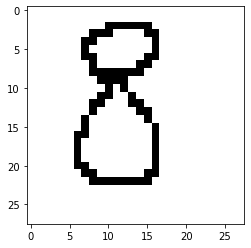

In [17]:
print("loading ... my_own_picture/2828_my_own_8.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_8.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.0810838 ]
 [0.05052927]
 [0.07384005]
 [0.20409219]
 [0.06820637]
 [0.05224604]
 [0.12083922]
 [0.10544228]
 [0.15994046]
 [0.14105321]]
network says  3


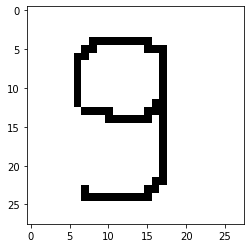

In [18]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.00152328]
 [0.01209005]
 [0.00795253]
 [0.97150115]
 [0.0113191 ]
 [0.24083065]
 [0.00778446]
 [0.0055414 ]
 [0.00372128]
 [0.00262858]]
network says  3


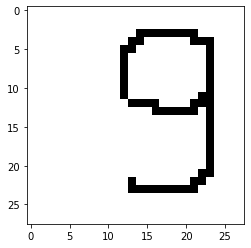

In [19]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.00190779]
 [0.01102743]
 [0.00915255]
 [0.97114656]
 [0.0070614 ]
 [0.21952233]
 [0.00541304]
 [0.00439899]
 [0.00410667]
 [0.0026378 ]]
network says  3


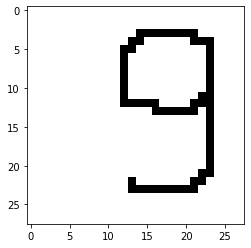

In [20]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_8.pnge
min= 0.01
max= 1.0
[[0.01545899]
 [0.00387302]
 [0.01460227]
 [0.81838094]
 [0.00282418]
 [0.02627144]
 [0.00307862]
 [0.00115177]
 [0.00328713]
 [0.00127271]]
network says  3


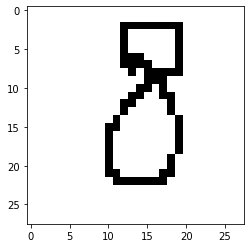

In [21]:
print("loading ... my_own_picture/2828_my_own_8.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_8.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_8.pnge
min= 0.01
max= 1.0
[[3.40770047e-04]
 [1.71809556e-03]
 [2.56367738e-04]
 [2.59031602e-03]
 [1.13936156e-01]
 [9.69182764e-01]
 [8.78605609e-04]
 [6.66815966e-03]
 [9.12134012e-05]
 [8.39673562e-03]]
network says  5


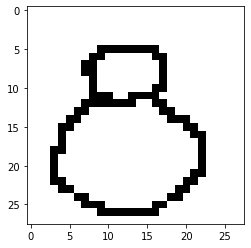

In [22]:
print("loading ... my_own_picture/2828_my_own_8.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_8.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

In [23]:
print("loading ... my_own_picture/2828_my_own_5.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_5.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_5.pnge


FileNotFoundError: No such file: 'C:\my_own_picture\2828_my_own_5.png'

loading ... my_own_picture/2828_my_own_5.pnge
min= 0.01
max= 1.0
[[1.02479846e-04]
 [5.17761472e-04]
 [5.27956593e-05]
 [1.69793816e-03]
 [7.33292969e-03]
 [9.95935924e-01]
 [1.03594040e-04]
 [3.93322087e-03]
 [4.21824717e-06]
 [2.43333962e-03]]
network says  5


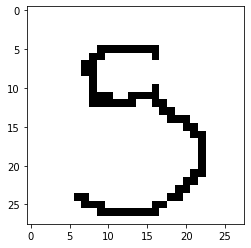

In [24]:
print("loading ... my_own_picture/2828_my_own_5.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_5.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.19149758]
 [0.03035366]
 [0.03480163]
 [0.08171146]
 [0.26236293]
 [0.03892712]
 [0.00546266]
 [0.21345288]
 [0.01357952]
 [0.02829203]]
network says  4


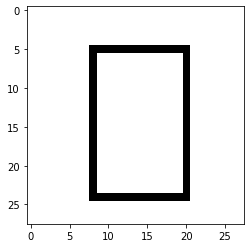

In [25]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.0777565 ]
 [0.03336353]
 [0.05023041]
 [0.08392138]
 [0.49776476]
 [0.01837716]
 [0.01843633]
 [0.2446018 ]
 [0.03172433]
 [0.02728508]]
network says  4


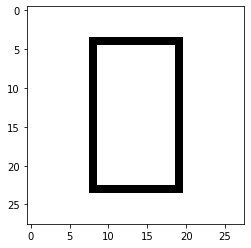

In [26]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 0.67
[[2.40333595e-06]
 [2.59223568e-04]
 [1.62403215e-01]
 [2.44917523e-08]
 [1.66215072e-03]
 [7.11092597e-04]
 [4.85515084e-05]
 [1.45327665e-06]
 [3.14550787e-12]
 [3.11452024e-02]]
network says  2


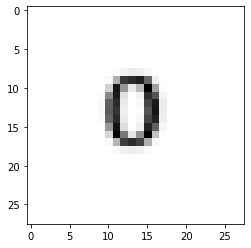

In [27]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 0.67
[[0.15199836]
 [0.00631841]
 [0.0124576 ]
 [0.00455143]
 [0.01281421]
 [0.02253069]
 [0.01367694]
 [0.02019909]
 [0.76001136]
 [0.09947819]]
network says  8


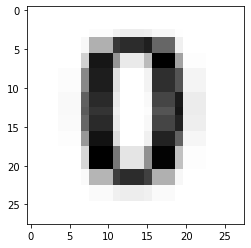

In [28]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.63027171]
 [0.02600472]
 [0.00313776]
 [0.05428975]
 [0.0443004 ]
 [0.01309446]
 [0.01038403]
 [0.13474561]
 [0.01760044]
 [0.10962813]]
network says  0


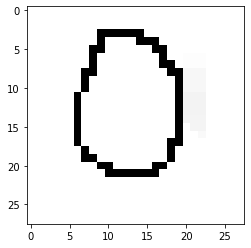

In [29]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.00586916]
 [0.00987625]
 [0.10550893]
 [0.00144829]
 [0.01647707]
 [0.3750411 ]
 [0.00300224]
 [0.04460662]
 [0.03474169]
 [0.02103537]]
network says  5


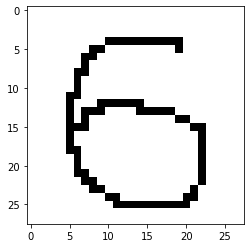

In [30]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.63027171]
 [0.02600472]
 [0.00313776]
 [0.05428975]
 [0.0443004 ]
 [0.01309446]
 [0.01038403]
 [0.13474561]
 [0.01760044]
 [0.10962813]]
network says  0


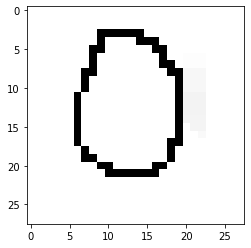

In [31]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[3.12054704e-03]
 [8.62643819e-03]
 [1.85408969e-01]
 [1.41759218e-03]
 [1.38948247e-04]
 [1.98239881e-01]
 [1.79850318e-01]
 [4.51334456e-02]
 [1.21395673e-02]
 [3.84917077e-03]]
network says  5


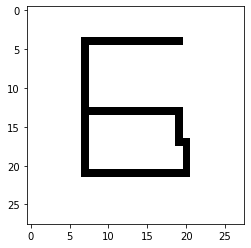

In [32]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.63027171]
 [0.02600472]
 [0.00313776]
 [0.05428975]
 [0.0443004 ]
 [0.01309446]
 [0.01038403]
 [0.13474561]
 [0.01760044]
 [0.10962813]]
network says  0


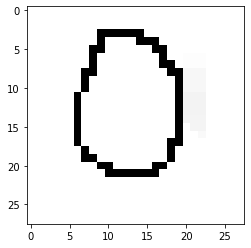

In [33]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[1.28540317e-04]
 [8.06750497e-04]
 [3.57597398e-04]
 [2.38394339e-01]
 [1.47004517e-03]
 [4.74553255e-01]
 [6.88628087e-03]
 [9.90256363e-01]
 [2.20379418e-03]
 [4.42753431e-04]]
network says  7


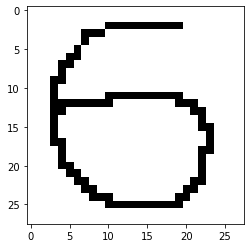

In [34]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 0.7709412
[[6.13708731e-03]
 [1.92039936e-03]
 [2.71670839e-02]
 [3.65886492e-04]
 [1.02997188e-02]
 [1.04637357e-02]
 [6.89577626e-03]
 [3.09650313e-03]
 [4.77495883e-03]
 [5.79673614e-01]]
network says  9


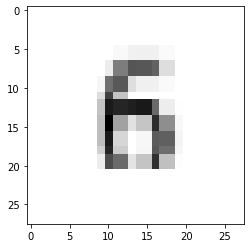

In [35]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 0.7709412
[[0.01445488]
 [0.01030163]
 [0.01232847]
 [0.00156986]
 [0.05942401]
 [0.94515095]
 [0.00459792]
 [0.04189552]
 [0.0149057 ]
 [0.02311585]]
network says  5


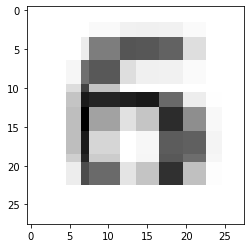

In [36]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.04683911]
 [0.04027032]
 [0.04186103]
 [0.01282265]
 [0.07638794]
 [0.93938001]
 [0.01400515]
 [0.07566233]
 [0.02290092]
 [0.0282438 ]]
network says  5


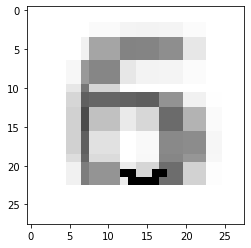

In [37]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.12211281]
 [0.05208627]
 [0.13059787]
 [0.16235451]
 [0.08129305]
 [0.03991781]
 [0.1082491 ]
 [0.12413642]
 [0.21554794]
 [0.14044413]]
network says  8


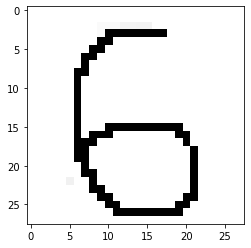

In [38]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_8.pnge
min= 0.01
max= 1.0
[[6.57767360e-05]
 [1.29740767e-04]
 [8.21497772e-05]
 [6.75745983e-05]
 [1.10392509e-04]
 [9.97518497e-01]
 [1.40163209e-04]
 [6.17712374e-04]
 [5.26442159e-06]
 [9.74524201e-03]]
network says  5


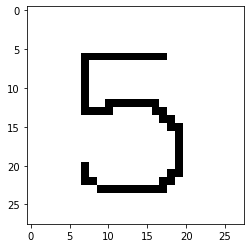

In [39]:
print("loading ... my_own_picture/2828_my_own_8.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_8.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.12211281]
 [0.05208627]
 [0.13059787]
 [0.16235451]
 [0.08129305]
 [0.03991781]
 [0.1082491 ]
 [0.12413642]
 [0.21554794]
 [0.14044413]]
network says  8


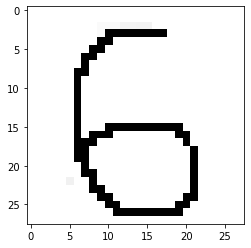

In [40]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.15490794]
 [0.06474695]
 [0.1436558 ]
 [0.20012052]
 [0.08835955]
 [0.03297032]
 [0.10063837]
 [0.15118424]
 [0.22538854]
 [0.15079769]]
network says  8


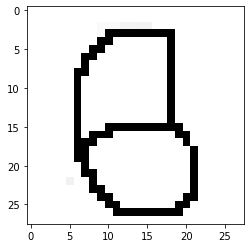

In [41]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_5.pnge
min= 0.01
max= 1.0
[[1.02479846e-04]
 [5.17761472e-04]
 [5.27956593e-05]
 [1.69793816e-03]
 [7.33292969e-03]
 [9.95935924e-01]
 [1.03594040e-04]
 [3.93322087e-03]
 [4.21824717e-06]
 [2.43333962e-03]]
network says  5


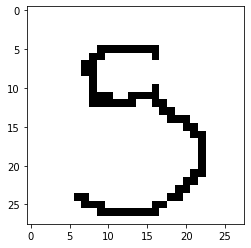

In [42]:
print("loading ... my_own_picture/2828_my_own_5.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_5.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_5.pnge
min= 0.01
max= 1.0
[[6.57767360e-05]
 [1.29740767e-04]
 [8.21497772e-05]
 [6.75745983e-05]
 [1.10392509e-04]
 [9.97518497e-01]
 [1.40163209e-04]
 [6.17712374e-04]
 [5.26442159e-06]
 [9.74524201e-03]]
network says  5


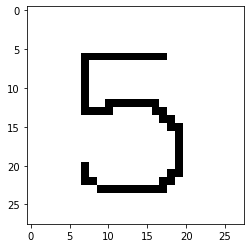

In [43]:
print("loading ... my_own_picture/2828_my_own_5.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_5.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_8.pnge
min= 0.01
max= 1.0
[[0.15490794]
 [0.06474695]
 [0.1436558 ]
 [0.20012052]
 [0.08835955]
 [0.03297032]
 [0.10063837]
 [0.15118424]
 [0.22538854]
 [0.15079769]]
network says  8


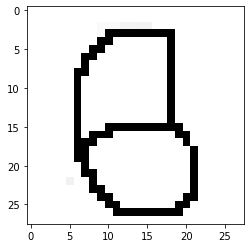

In [44]:
print("loading ... my_own_picture/2828_my_own_8.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_8.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_7.pnge
min= 0.01
max= 1.0
[[1.54913238e-03]
 [2.33779806e-01]
 [3.16967242e-02]
 [5.11976500e-01]
 [2.51280894e-04]
 [4.97790418e-03]
 [7.80251308e-04]
 [2.46754286e-03]
 [8.60549247e-05]
 [2.71503812e-04]]
network says  3


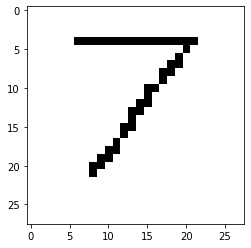

In [45]:
print("loading ... my_own_picture/2828_my_own_7.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_7.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_7.pnge
min= 0.01
max= 1.0
[[3.73283087e-03]
 [1.24625433e-01]
 [7.24294468e-02]
 [1.20478147e-03]
 [9.28275017e-03]
 [7.98248832e-04]
 [8.32528531e-04]
 [8.44557107e-01]
 [9.54916855e-03]
 [3.07472474e-03]]
network says  7


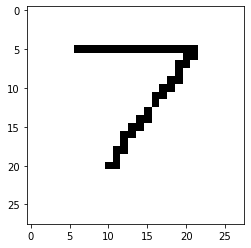

In [46]:
print("loading ... my_own_picture/2828_my_own_7.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_7.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.06445934]
 [0.04327572]
 [0.51046121]
 [0.07367388]
 [0.00883376]
 [0.01948927]
 [0.01727982]
 [0.24377789]
 [0.05666937]
 [0.03042153]]
network says  2


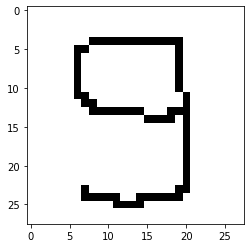

In [47]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.02199504]
 [0.03299445]
 [0.02783982]
 [0.8047187 ]
 [0.00834411]
 [0.08498597]
 [0.03071916]
 [0.15142841]
 [0.04903998]
 [0.02318672]]
network says  3


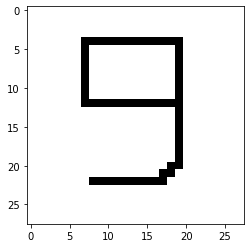

In [48]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.03734309]
 [0.0471761 ]
 [0.01790454]
 [0.15246158]
 [0.01658399]
 [0.06408543]
 [0.17748288]
 [0.18649457]
 [0.01361116]
 [0.27567567]]
network says  9


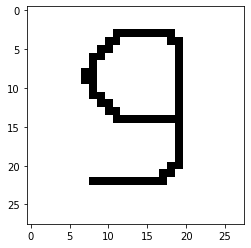

In [49]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.63027171]
 [0.02600472]
 [0.00313776]
 [0.05428975]
 [0.0443004 ]
 [0.01309446]
 [0.01038403]
 [0.13474561]
 [0.01760044]
 [0.10962813]]
network says  0


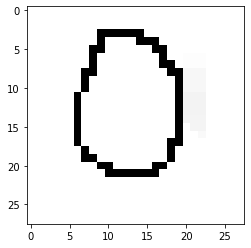

In [50]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.16402208]
 [0.17405561]
 [0.16020218]
 [0.29009898]
 [0.20632197]
 [0.40312438]
 [0.251388  ]
 [0.17460499]
 [0.13594939]
 [0.15923695]]
network says  5


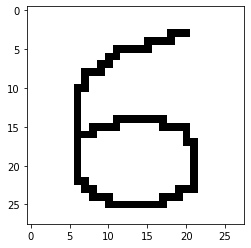

In [51]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.03734309]
 [0.0471761 ]
 [0.01790454]
 [0.15246158]
 [0.01658399]
 [0.06408543]
 [0.17748288]
 [0.18649457]
 [0.01361116]
 [0.27567567]]
network says  9


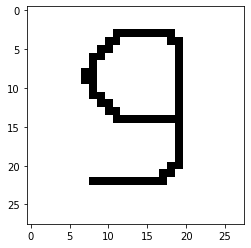

In [52]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.19418818]
 [0.20615046]
 [0.16276125]
 [0.19340894]
 [0.19283253]
 [0.67985638]
 [0.26574729]
 [0.19821356]
 [0.09068291]
 [0.08852855]]
network says  5


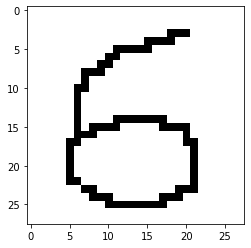

In [53]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.04636881]
 [0.04756522]
 [0.04500021]
 [0.03012938]
 [0.13632263]
 [0.88896694]
 [0.06329612]
 [0.07563131]
 [0.17436126]
 [0.14031621]]
network says  5


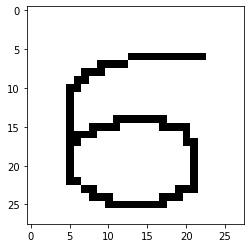

In [54]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.04427399]
 [0.0589137 ]
 [0.06195965]
 [0.09409025]
 [0.16813283]
 [0.30376881]
 [0.17153228]
 [0.10578782]
 [0.0835111 ]
 [0.02518214]]
network says  5


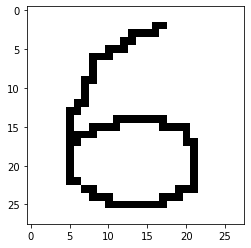

In [55]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[1.00642699e-03]
 [3.20032726e-03]
 [6.75995725e-03]
 [2.48509620e-04]
 [9.79026617e-05]
 [6.93869305e-01]
 [1.32597685e-01]
 [9.86156782e-02]
 [2.40232814e-03]
 [1.27458673e-01]]
network says  5


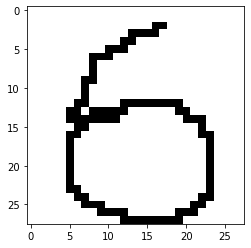

In [56]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.02372618]
 [0.06068386]
 [0.43073109]
 [0.01119735]
 [0.00788637]
 [0.62127042]
 [0.0347142 ]
 [0.21723876]
 [0.03933798]
 [0.13392411]]
network says  5


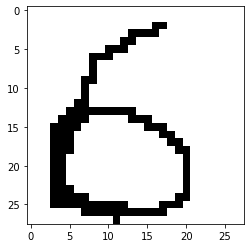

In [57]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.24878735]
 [0.33487061]
 [0.20407997]
 [0.03269304]
 [0.22150348]
 [0.99840062]
 [0.19388843]
 [0.25873111]
 [0.03447959]
 [0.05273645]]
network says  5


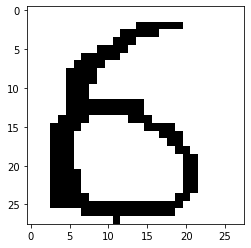

In [58]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[4.56712578e-02]
 [4.17563508e-02]
 [7.05688344e-04]
 [8.82016836e-04]
 [1.14270758e-01]
 [9.63853336e-01]
 [2.61428013e-02]
 [1.62317588e-01]
 [9.63440187e-04]
 [1.12263219e-01]]
network says  5


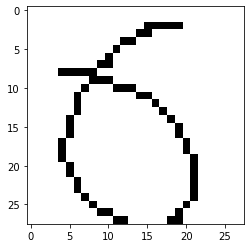

In [59]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.06257172]
 [0.08959971]
 [0.06419535]
 [0.08064518]
 [0.0442359 ]
 [0.32239097]
 [0.08363609]
 [0.11231454]
 [0.04162383]
 [0.02988556]]
network says  5


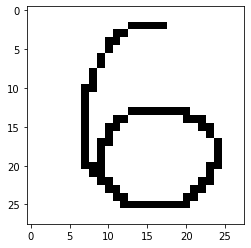

In [60]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.00227139]
 [0.01144888]
 [0.03334136]
 [0.21638316]
 [0.00744649]
 [0.04284295]
 [0.09998068]
 [0.03212108]
 [0.43412843]
 [0.0010464 ]]
network says  8


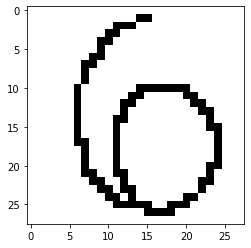

In [61]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.01448767]
 [0.06413451]
 [0.03118186]
 [0.04969734]
 [0.01614867]
 [0.02276537]
 [0.04028983]
 [0.03750892]
 [0.34184874]
 [0.00407768]]
network says  8


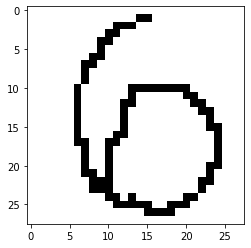

In [62]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.09253727]
 [0.05846315]
 [0.11779945]
 [0.19152649]
 [0.08029048]
 [0.04675314]
 [0.1207436 ]
 [0.14018592]
 [0.27275321]
 [0.12443111]]
network says  8


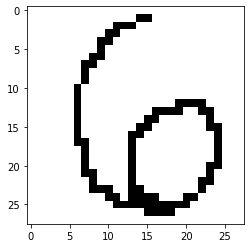

In [63]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.0559792 ]
 [0.05221332]
 [0.07281263]
 [0.11036094]
 [0.07790186]
 [0.03630401]
 [0.23575049]
 [0.2125687 ]
 [0.14300326]
 [0.18692607]]
network says  6


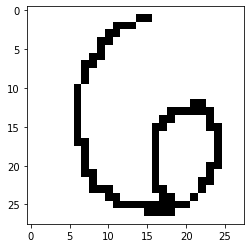

In [64]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_0.pnge
min= 0.01
max= 1.0
[[0.63027171]
 [0.02600472]
 [0.00313776]
 [0.05428975]
 [0.0443004 ]
 [0.01309446]
 [0.01038403]
 [0.13474561]
 [0.01760044]
 [0.10962813]]
network says  0


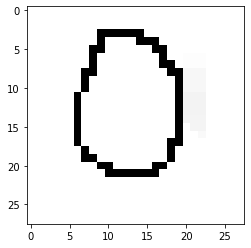

In [65]:
print("loading ... my_own_picture/2828_my_own_0.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_0.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_1.pnge
min= 0.01
max= 1.0
[[8.65685299e-04]
 [8.80375755e-01]
 [4.49646479e-03]
 [4.68036008e-02]
 [3.45493220e-05]
 [8.47195280e-04]
 [3.65152276e-04]
 [6.82266350e-04]
 [8.87734272e-04]
 [1.44104896e-03]]
network says  1


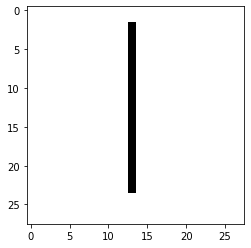

In [66]:
print("loading ... my_own_picture/2828_my_own_1.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_1.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_2.pnge
min= 0.01
max= 1.0
[[2.02198649e-05]
 [7.60124998e-04]
 [9.98582977e-01]
 [2.82259372e-06]
 [3.86286815e-04]
 [4.17023725e-02]
 [3.76969253e-04]
 [1.22060090e-03]
 [3.46470102e-06]
 [6.45477396e-03]]
network says  2


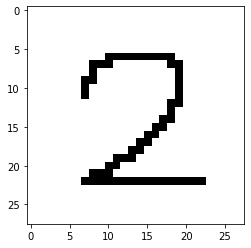

In [67]:
print("loading ... my_own_picture/2828_my_own_2.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_2.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_3.pnge
min= 0.01
max= 1.0
[[0.00266916]
 [0.02067836]
 [0.01231975]
 [0.89232489]
 [0.00643798]
 [0.01614216]
 [0.09535686]
 [0.00673278]
 [0.01103306]
 [0.00250761]]
network says  3


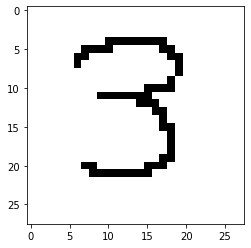

In [68]:
print("loading ... my_own_picture/2828_my_own_3.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_3.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_4.pnge
min= 0.01
max= 1.0
[[2.68414010e-03]
 [3.36268103e-03]
 [7.32530341e-03]
 [6.36129164e-04]
 [9.99719474e-01]
 [1.79025585e-02]
 [5.09140023e-04]
 [1.10066972e-02]
 [3.41694935e-03]
 [3.72149785e-04]]
network says  4


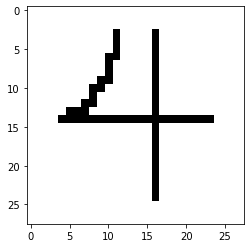

In [69]:
print("loading ... my_own_picture/2828_my_own_4.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_4.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_5.pnge
min= 0.01
max= 1.0
[[6.57767360e-05]
 [1.29740767e-04]
 [8.21497772e-05]
 [6.75745983e-05]
 [1.10392509e-04]
 [9.97518497e-01]
 [1.40163209e-04]
 [6.17712374e-04]
 [5.26442159e-06]
 [9.74524201e-03]]
network says  5


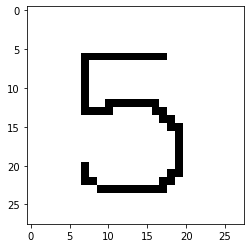

In [70]:
print("loading ... my_own_picture/2828_my_own_5.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_5.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_6.pnge
min= 0.01
max= 1.0
[[0.0559792 ]
 [0.05221332]
 [0.07281263]
 [0.11036094]
 [0.07790186]
 [0.03630401]
 [0.23575049]
 [0.2125687 ]
 [0.14300326]
 [0.18692607]]
network says  6


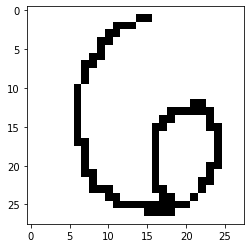

In [71]:
print("loading ... my_own_picture/2828_my_own_6.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_6.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_7.pnge
min= 0.01
max= 1.0
[[3.73283087e-03]
 [1.24625433e-01]
 [7.24294468e-02]
 [1.20478147e-03]
 [9.28275017e-03]
 [7.98248832e-04]
 [8.32528531e-04]
 [8.44557107e-01]
 [9.54916855e-03]
 [3.07472474e-03]]
network says  7


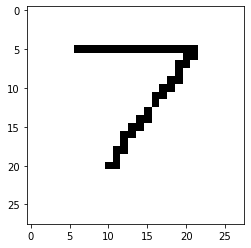

In [72]:
print("loading ... my_own_picture/2828_my_own_7.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_7.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_8.pnge
min= 0.01
max= 1.0
[[0.15490794]
 [0.06474695]
 [0.1436558 ]
 [0.20012052]
 [0.08835955]
 [0.03297032]
 [0.10063837]
 [0.15118424]
 [0.22538854]
 [0.15079769]]
network says  8


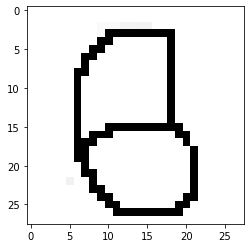

In [73]:
print("loading ... my_own_picture/2828_my_own_8.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_8.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)

loading ... my_own_picture/2828_my_own_9.pnge
min= 0.01
max= 1.0
[[0.03734309]
 [0.0471761 ]
 [0.01790454]
 [0.15246158]
 [0.01658399]
 [0.06408543]
 [0.17748288]
 [0.18649457]
 [0.01361116]
 [0.27567567]]
network says  9


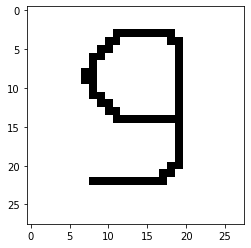

In [74]:
print("loading ... my_own_picture/2828_my_own_9.pnge")

img_array = imageio.imread('C:/my_own_picture/2828_my_own_9.png', as_gray = True)

img_data = 255.0 - img_array.reshape(784)
img_data = (img_data / 255.0 * 0.99) + 0.01

print("min=", numpy.min(img_data))
print("max=", numpy.max(img_data))

matplotlib.pyplot.imshow(img_data.reshape(28, 28), cmap='Greys', interpolation='None')
outputs = n.query(img_data)

print(outputs)
label = numpy.argmax(outputs)
print("network says ", label)